# Introduction

This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
For example, here's several helpful packages to load

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as pp
from decision_trees import Preprocessor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_train: pd.DataFrame = pd.read_csv("./input/train.csv")
df_test: pd.DataFrame = pd.read_csv("./input/test.csv")

df_train.describe()
print(df_train.info())
print(df_train.head(10))
print(df_train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

# Preprocessing (siehe Preprocessor)

In [2]:
X_y, X, y = Preprocessor().process(df_train)

X.describe()
X.info()
X.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,7.120000e+02,712.000000
mean,448.589888,2.240169,0.636236,29.642093,0.514045,0.432584,-6.736185e-17,1.595506
std,258.683191,0.836854,0.481420,14.492933,0.930692,0.854181,1.000703e+00,0.779038
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,-6.534272e-01,0.000000
25%,222.750000,1.000000,0.000000,20.000000,0.000000,0.000000,-5.012575e-01,2.000000
50%,445.000000,2.000000,1.000000,28.000000,0.000000,0.000000,-3.576726e-01,2.000000
75%,677.250000,3.000000,1.000000,38.000000,1.000000,1.000000,-2.962586e-02,2.000000
max,891.000000,3.000000,1.000000,80.000000,5.000000,6.000000,9.031168e+00,2.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Sex          712 non-null    float64
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked     712 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 50.1 KB


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1.0,22.0,1,0,-0.516380,2.0
1,2,1,0.0,38.0,1,0,0.694046,0.0
2,3,3,0.0,26.0,0,0,-0.503620,2.0
3,4,1,0.0,35.0,1,0,0.350326,2.0
4,5,3,1.0,35.0,0,0,-0.501257,2.0
6,7,1,1.0,54.0,0,0,0.326933,2.0
7,8,3,1.0,2.0,3,1,-0.255045,2.0
8,9,3,0.0,27.0,0,2,-0.442974,2.0
9,10,2,0.0,14.0,1,0,-0.084997,0.0
10,11,3,0.0,4.0,1,1,-0.337746,2.0


# Korrelations Matrix
Anfangs erkennen zwischen welchen Features hohe  Korrelationen zu erwarten sind und diese sich genauer ansehen

In [3]:
corr_matrix: pd.DataFrame = X.corr()
corr_matrix


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035609,0.024674,0.033681,-0.082704,-0.011672,0.009655,-0.001836
Pclass,-0.035609,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.024674,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,0.033681,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.082704,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,-0.011672,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.009655,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.001836,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


# Categorial plots

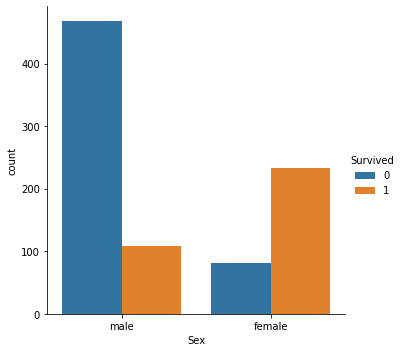

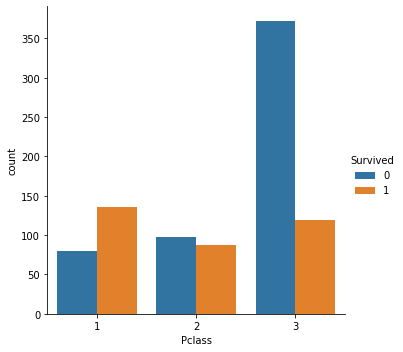

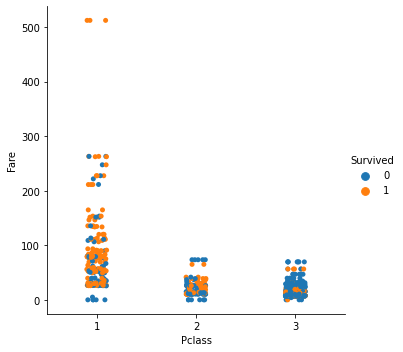

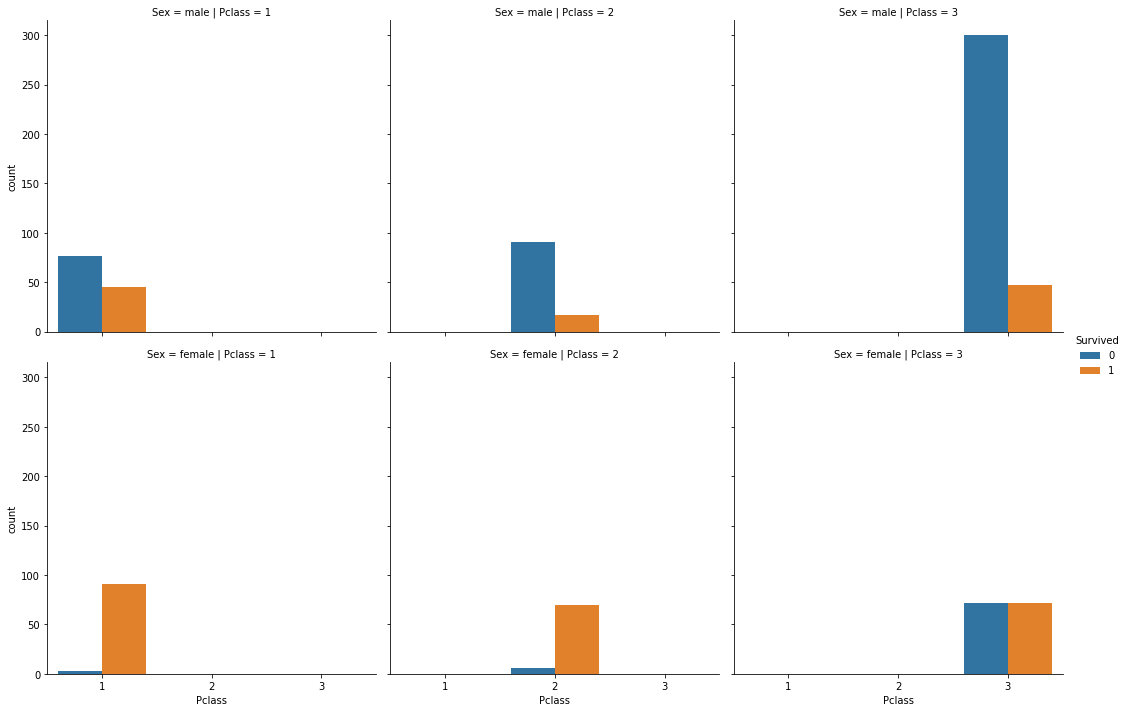

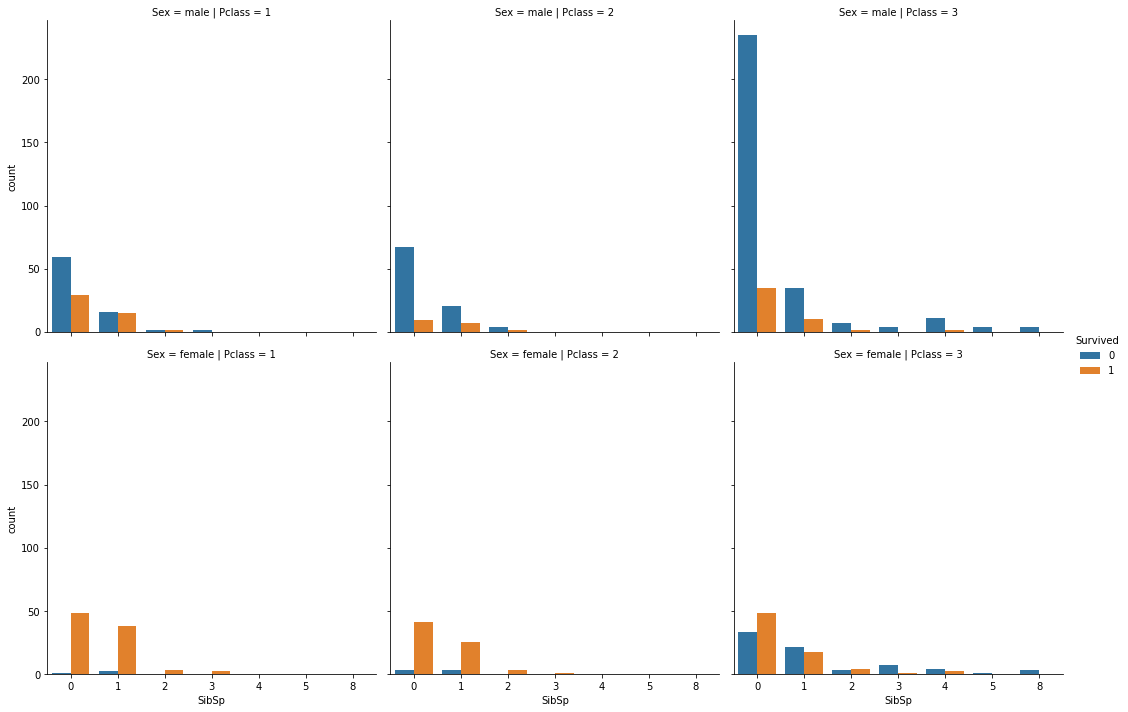

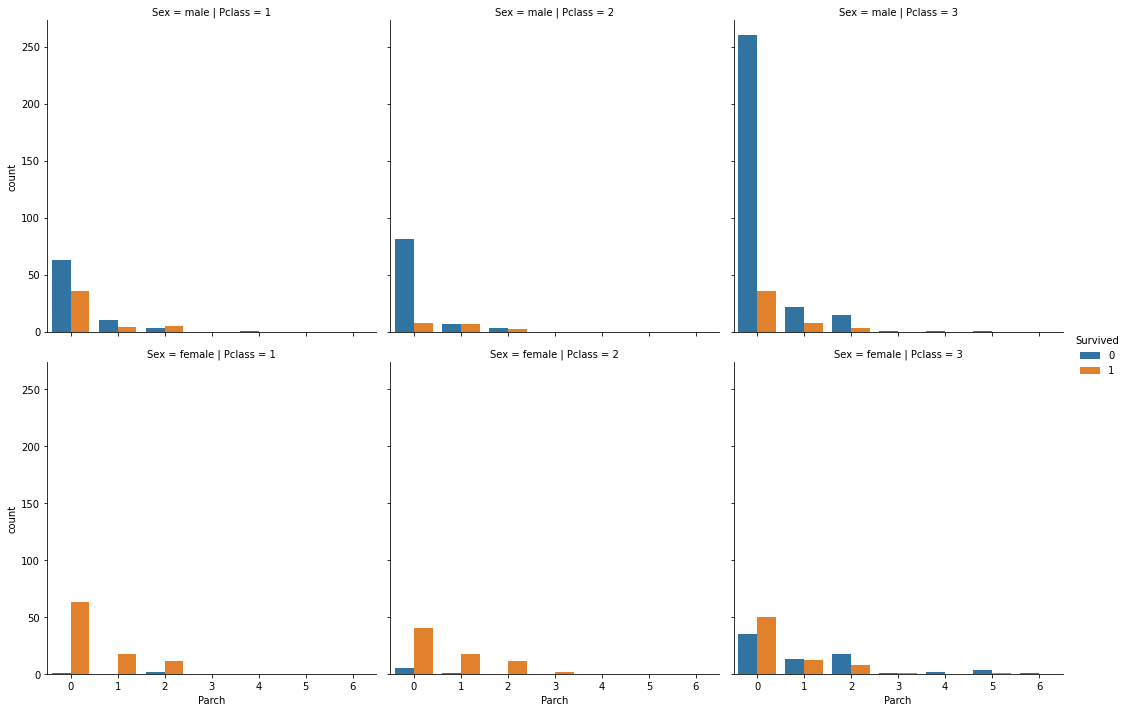

In [4]:
# sns.countplot(x='Sex', hue='Survived', data=df_train)
sns.catplot(x='Sex', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', data=df_train, kind='count')
pp.show()
sns.catplot(x='Pclass', hue='Survived', y='Fare', data=df_train)
pp.show()
sns.catplot(x='Pclass', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='SibSp', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

sns.catplot(x='Parch', hue='Survived', row='Sex', col='Pclass', data=df_train, kind='count')
pp.show()

#sns.histplot(x='Age', hue='Survived', data=df_train, binwidth=5.0)
#sns.displot(x='Age', hue='Survived', col='Survived', data=df_train)
#pp.show()

# Distribution plots

## By age

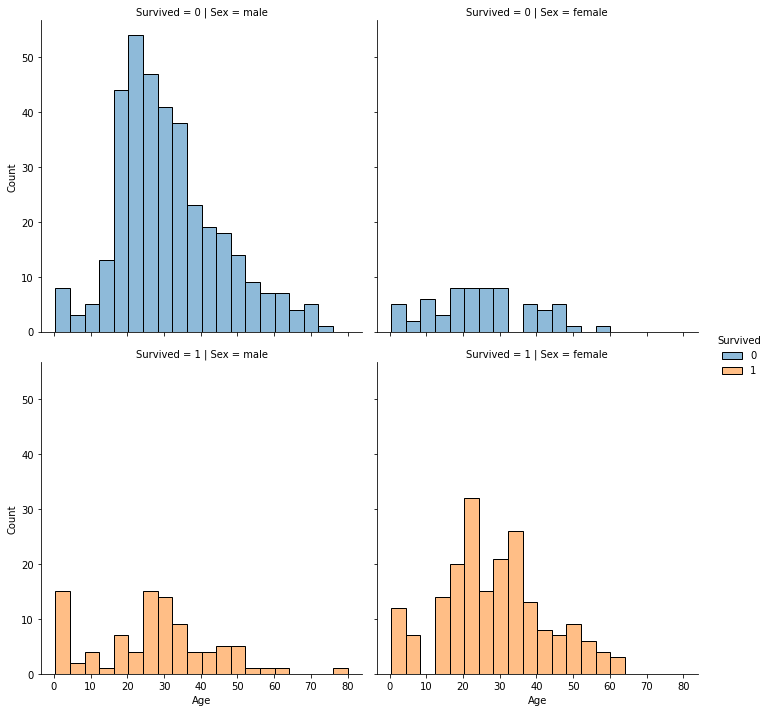

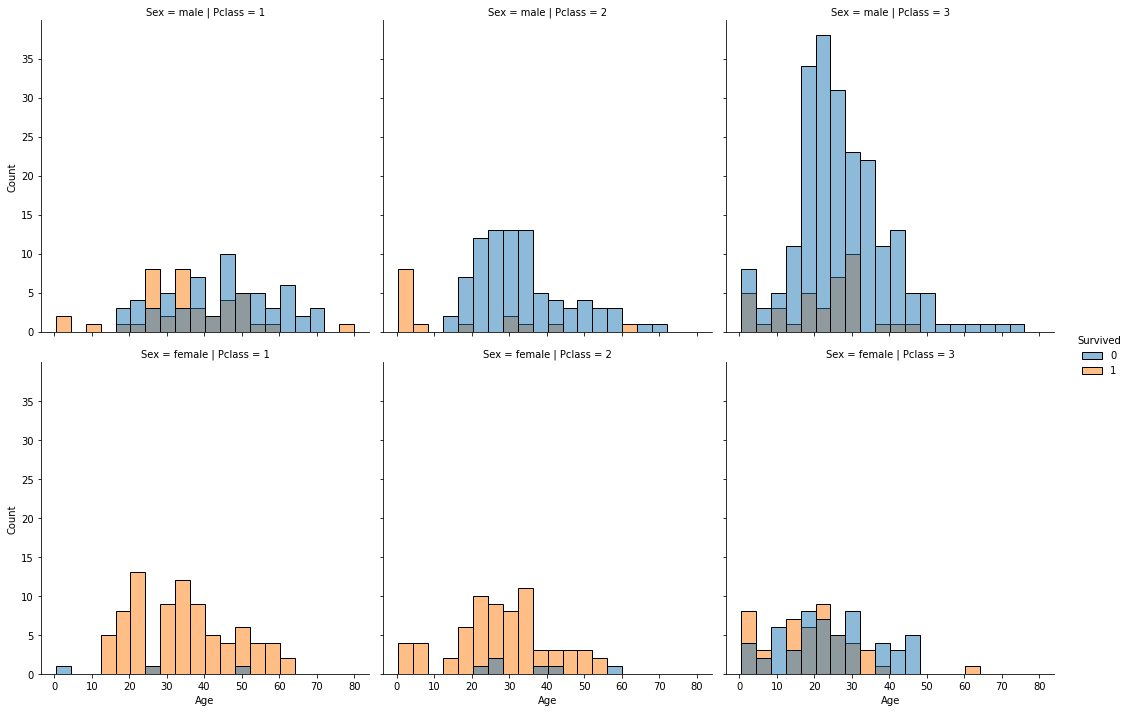

In [5]:
sns.displot(x='Age', hue='Survived', col='Sex', row='Survived', data=df_train)
pp.show()

sns.displot(x='Age', hue='Survived', col='Pclass', row='Sex', data=df_train)
pp.show()

## By fare

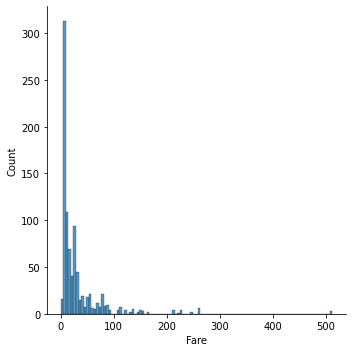

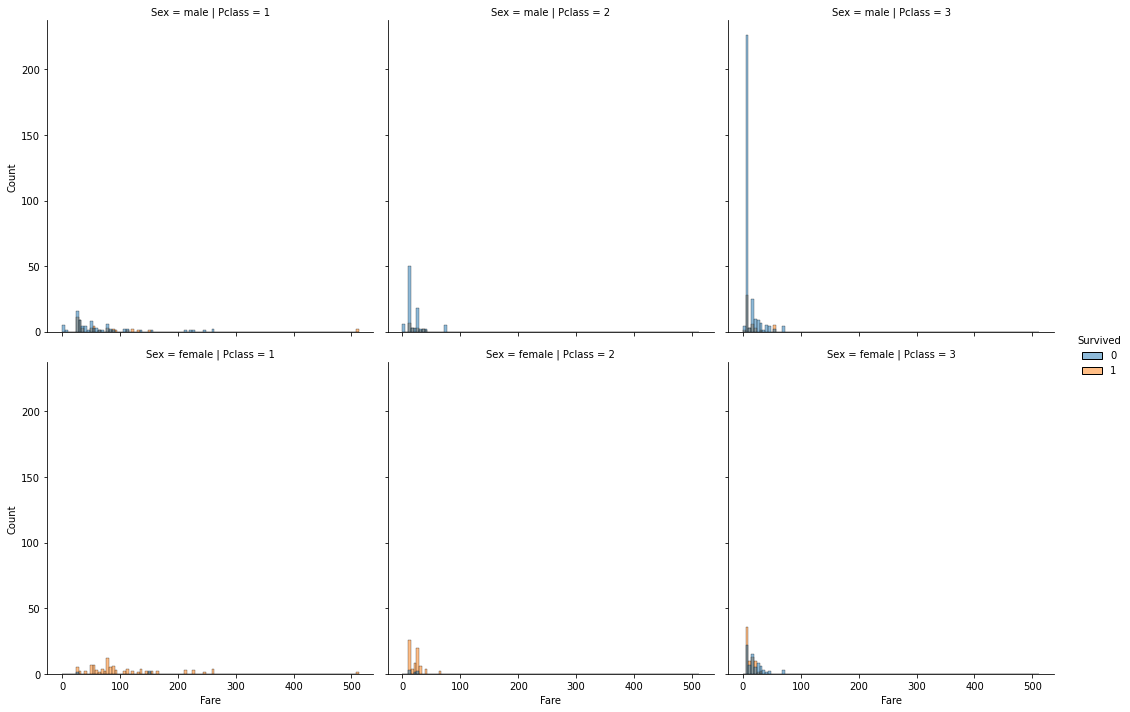

In [14]:
sns.displot(x='Fare', data=df_train)
pp.show()


sns.displot(x='Fare', hue='Survived', col='Pclass', row='Sex', data=df_train)
pp.show()


In [7]:
# Numeric features: Find pairwise linear dependencies with pair plots in

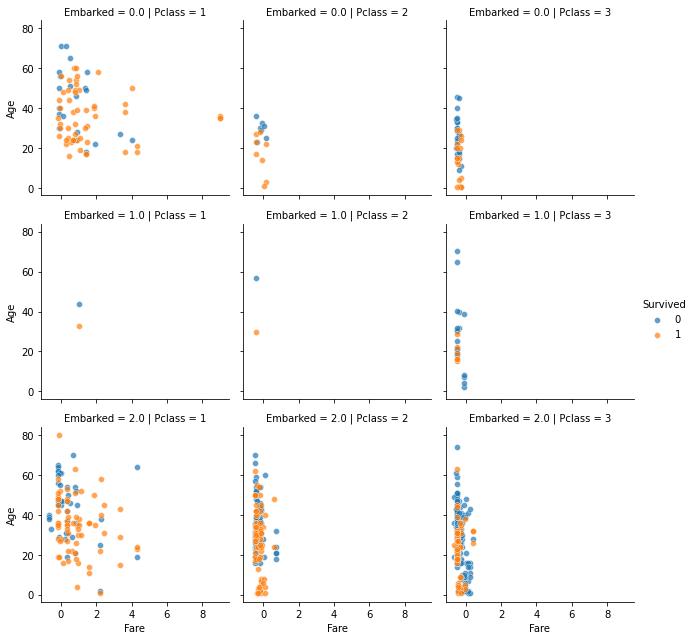

In [12]:
g = sns.FacetGrid(X_y, row="Sex", col="Pclass", hue="Survived")
g.map(sns.scatterplot, "Fare", "Age", alpha=.7)
g.add_legend()


# DecisionTree: Create train and test data from train data set

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


cross_val_score(DecisionTreeClassifier(random_state=42), cv=5, X=X.to_numpy(), y=y.to_numpy()).mean()


# RandomForest: Create train and test data from train data set

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


n_max_features = int(np.sqrt(X.columns.size))
classifier = RandomForestClassifier(max_features=n_max_features, random_state=42)
# classifier.fit(X_train, y_train)

classifier.score(X, y)
cross_val_score(RandomForestClassifier(max_features=n_max_features, random_state=42), cv=5, X=X.to_numpy(), y=y.to_numpy()).mean()